# Predicting Depression

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/depression-professional-dataset/Depression Professional Dataset.csv


In [2]:
df=pd.read_csv('/kaggle/input/depression-professional-dataset/Depression Professional Dataset.csv')

In [3]:
df.head()

,Gender,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,37,2.0,4.0,7-8 hours,Moderate,No,6,2,No,No
1,Male,60,4.0,3.0,5-6 hours,Unhealthy,Yes,0,4,Yes,No
2,Female,42,2.0,3.0,5-6 hours,Moderate,No,0,2,No,No
3,Female,44,3.0,5.0,7-8 hours,Healthy,Yes,1,2,Yes,No
4,Male,48,4.0,3.0,7-8 hours,Moderate,Yes,6,5,Yes,No


In [4]:
df.nunique()

Gender                                    2
Age                                      43
Work Pressure                             5
Job Satisfaction                          5
Sleep Duration                            4
Dietary Habits                            3
Have you ever had suicidal thoughts ?     2
Work Hours                               13
Financial Stress                          5
Family History of Mental Illness          2
Depression                                2
dtype: int64

First, we check for null rows where we find none.

In [5]:
# check for null rows
df.isnull().sum()

Gender                                   0
Age                                      0
Work Pressure                            0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Work Hours                               0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.dtypes

Gender                                    object
Age                                        int64
Work Pressure                            float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Have you ever had suicidal thoughts ?     object
Work Hours                                 int64
Financial Stress                           int64
Family History of Mental Illness          object
Depression                                object
dtype: object

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

We look at the distributions of the categorical variables and we find that they are quite balanced across the categories.

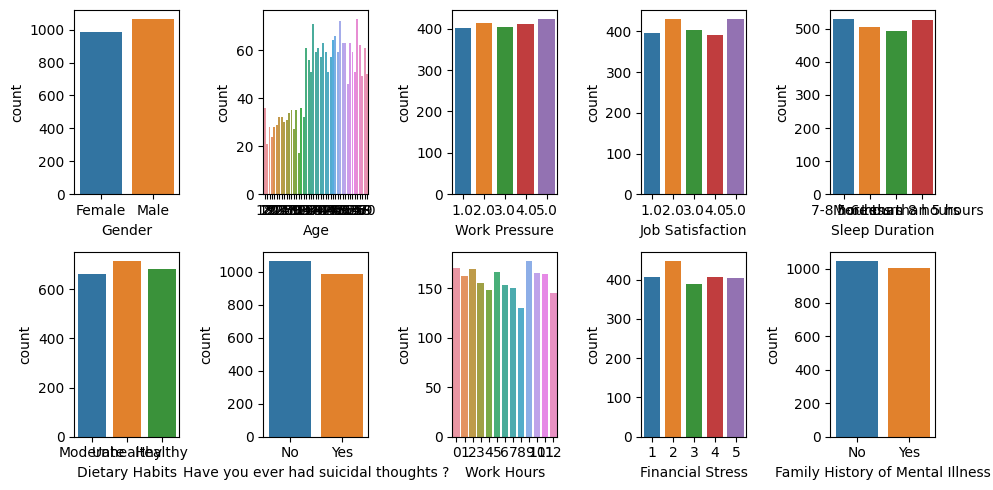

In [9]:
fig,ax=plt.subplots(2,5,figsize=(10,5))

j=0
for i,t in enumerate(df.columns[:-1]):
    
    ax[i//5][i%5]=sns.countplot(x=df[t],ax=ax[i//5][i%5])
    j+=1

fig.tight_layout()
plt.show()


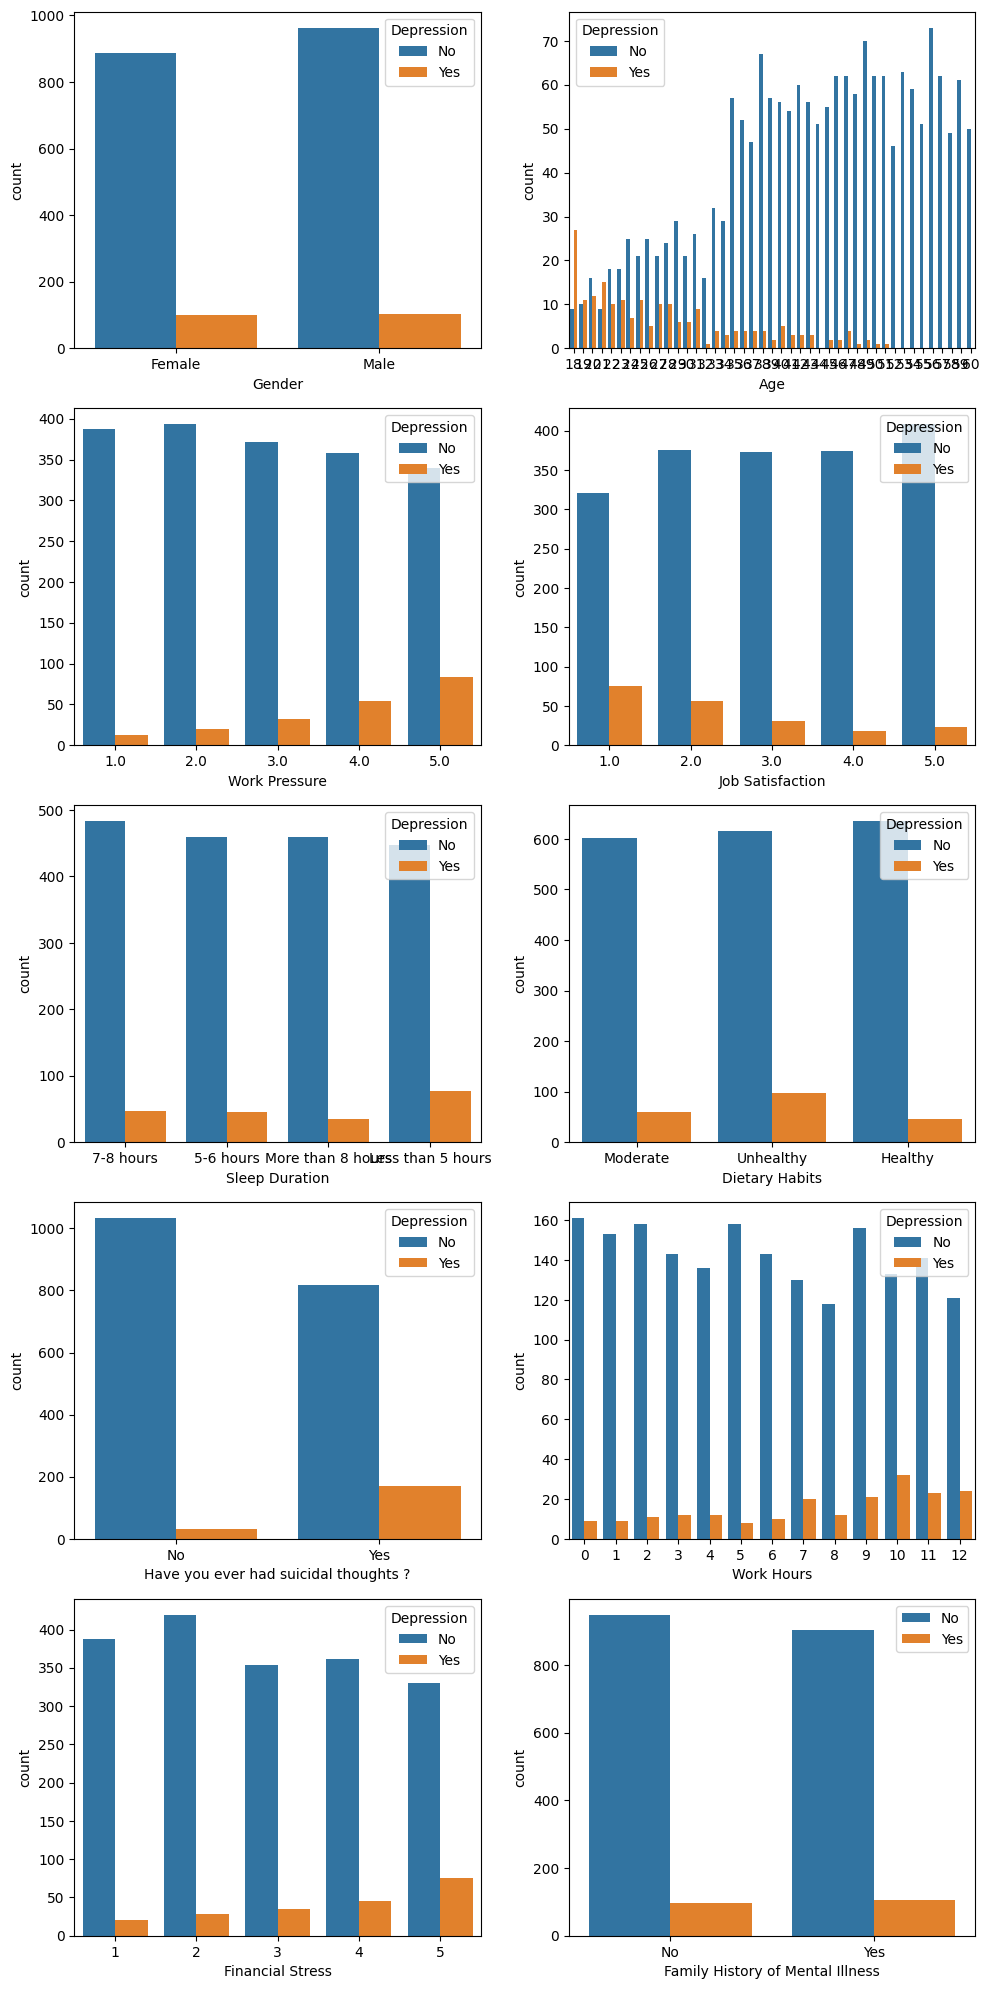

In [16]:
fig,ax=plt.subplots(5,2,figsize=(10,20))

j=0
for i,t in enumerate(df.columns[:-1]):
    
    ax[i//2][i%2]=sns.countplot(x=df[t],hue=df['Depression'],ax=ax[i//2][i%2])
    j+=1

fig.tight_layout()
plt.legend()
plt.show()

## Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegressionCV

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
for column in df:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [ ]:
df

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X=df.drop(['Depression'],axis=1)
y=df['Depression']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

lbfgs didnt work

In [23]:
clf = LogisticRegressionCV(cv=5, random_state=0,solver='liblinear')
clf.fit(X_train,y_train)

LogisticRegressionCV(cv=5, random_state=0, solver='liblinear')

In [24]:
preds=clf.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
cm = confusion_matrix(y_test, preds)
print(cm)
accuracy_score(y_test, preds)
f1_score(y_test,preds)

[[456   5]
 [  7  46]]


0.8846153846153846

We are going to try again with different scoring.

In [26]:
clf = LogisticRegressionCV(cv=5, random_state=0,solver='liblinear',scoring='f1')
clf.fit(X_train,y_train)

LogisticRegressionCV(cv=5, random_state=0, scoring='f1', solver='liblinear')

In [27]:
preds=clf.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
cm = confusion_matrix(y_test, preds)
print(cm)
accuracy_score(y_test, preds)
f1_score(y_test,preds)

[[456   5]
 [  7  46]]


0.8846153846153846

# Class balance

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)

In [29]:
clf = LogisticRegressionCV(cv=5, random_state=0,solver='liblinear',scoring='f1')
clf.fit(X_train,y_train)

LogisticRegressionCV(cv=5, random_state=0, scoring='f1', solver='liblinear')

In [30]:
preds=clf.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
cm = confusion_matrix(y_test, preds)
print(cm)
accuracy_score(y_test, preds)
f1_score(y_test,preds)

[[455   8]
 [  3  48]]


0.897196261682243

In [56]:
clf = LogisticRegressionCV(cv=5, random_state=0,solver='liblinear',scoring='f1',penalty='l1',Cs=[0.01,0.1,1,5,10,20])
clf.fit(X_train,y_train)
preds=clf.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
cm = confusion_matrix(y_test, preds)
print(cm)
print('accuracy:',accuracy_score(y_test, preds),'f1:',f1_score(y_test,preds))

[[455   8]
 [  3  48]]
accuracy: 0.9785992217898832 f1: 0.897196261682243


In [32]:
from sklearn.ensemble import RandomForestClassifier

Below model uses default 

In [55]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
preds=rf.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
cm = confusion_matrix(y_test, preds)
print(cm)
print('accuracy:',accuracy_score(y_test, preds),'f1:',f1_score(y_test,preds))

[[463   0]
 [ 24  27]]
accuracy: 0.953307392996109 f1: 0.6923076923076924


Tune hyperparams

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [35]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ce180e7f2b0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ce180e7f760>})

In [36]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 14, 'n_estimators': 124}


In [37]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('accuracy:',accuracy_score(y_test, preds),'f1:',f1_score(y_test,preds))

[[463   0]
 [ 22  29]]
accuracy: 0.9552529182879378 f1: 0.7088607594936709


In [57]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier(random_state=42, oob_score=True, class_weight={0:1,1:100})

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight={0: 1, 1: 100},
                                                    oob_score=True,
                                                    random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ce184e8f760>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ce18713ee60>})

In [58]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 11, 'n_estimators': 223}


In [59]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('accuracy:',accuracy_score(y_test, y_pred),'f1:',f1_score(y_test,y_pred))

[[462   1]
 [ 21  30]]
accuracy: 0.9571984435797666 f1: 0.7317073170731707


In [51]:
from xgboost import XGBClassifier
model = XGBClassifier(random_state=1)
model.fit(X_train, y_train) 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [52]:
xgbpreds=model.predict(X_test)

In [53]:
cm = confusion_matrix(y_test, xgbpreds)
print(cm)
print('accuracy:',accuracy_score(y_test, xgbpreds),'f1:',f1_score(y_test,xgbpreds))

[[461   2]
 [ 11  40]]
accuracy: 0.9747081712062257 f1: 0.8602150537634408


In [60]:
param_dist = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0]
}

random_search = RandomizedSearchCV(
    XGBClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=10,  # Number of random combinations to test
    cv=3,
    scoring="accuracy",
    verbose=1,
    random_state=42
)

random_search.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 300],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=1)

In [62]:
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best RMSE: {random_search.best_score_:.4f}")

Best Parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
Best RMSE: 0.9662


In [63]:
model = XGBClassifier(**random_search.best_params_, random_state=42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [64]:
xgbpreds=model.predict(X_test)

In [65]:
cm = confusion_matrix(y_test, xgbpreds)
print(cm)
print('accuracy:',accuracy_score(y_test, xgbpreds),'f1:',f1_score(y_test,xgbpreds))

[[461   2]
 [  8  43]]
accuracy: 0.980544747081712 f1: 0.8958333333333333


In [42]:
from sklearn import metrics

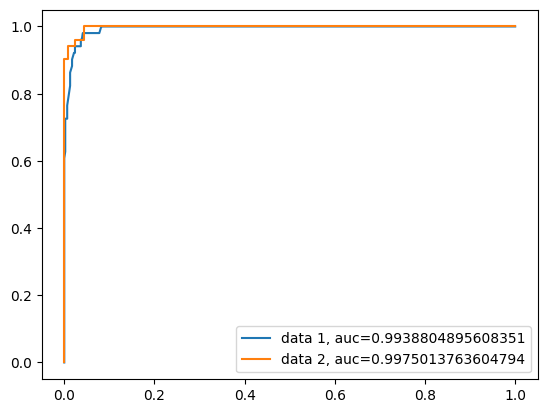

In [50]:
y_pred_proba = best_rf.predict_proba(X_test)[::,1]
clf_y_pred=clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
lfpr,ltpr,_= metrics.roc_curve(y_test,  clf_y_pred)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
clf_auc = metrics.roc_auc_score(y_test, clf_y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot(lfpr,ltpr,label="data 2, auc="+str(clf_auc))
plt.legend(loc=4)
plt.show()

In [ ]:
len(df.index[df['Depression']==1].tolist())

idis=df.index[df['Depression']==1].tolist()

filtered_df = df[df['Depression'] == 1]

# Step 2: Sample 2 rows from the filtered DataFrame
sampled_rows = filtered_df.sample(n=400, random_state=42,replace=True)

exclude_column = 'Depression'

# Step 1: Select columns to modify (all but 'A')
columns_to_modify = sampled_rows.columns.difference([exclude_column])

# Step 2: Add Gaussian noise to the selected columns
noise = np.random.normal(0, 1, sampled_rows[columns_to_modify].shape)  # Noise with mean=0, std=1
df_with_noise = sampled_rows.copy()
df_with_noise[columns_to_modify] += noise
# Step 3 (Optional): Append sampled rows back to the original DataFrame
df_augmented = pd.concat([df, df_with_noise], ignore_index=True)

X=df_augmented.drop(['Depression'],axis=1)
y=df_augmented['Depression']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)

clf = LogisticRegressionCV(cv=5, random_state=0,solver='liblinear',scoring='f1',penalty='l1',Cs=[0.01,0.1,1,5,10,20])
clf.fit(X_train,y_train)
preds=clf.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
cm = confusion_matrix(y_test, preds)
print(cm)
print('accuracy:',accuracy_score(y_test, preds),'f1:',f1_score(y_test,preds))

In [44]:
import catboost
from catboost import CatBoostRegressor